In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
wine = load_wine()
wine_std = StandardScaler().fit_transform(wine.data)
wine_std.shape

(178, 13)

In [3]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
wine_pca = pca.fit_transform(wine_std)

- 군집화

In [4]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=2022)
kmeans.fit(wine_std)

KMeans(n_clusters=3, random_state=2022)

In [5]:
# DataFrame으로 만들기 
df = pd.DataFrame({
     'PC1': wine_pca[:,0], 
     'PC2': wine_pca[:,1] ,
     'target': wine.target,
     'cluster': kmeans.labels_
})
df.head(55).tail(5)

,PC1,PC2,target,cluster
50,3.214917,-0.166992,0,2
51,2.858960,-0.745279,0,2
52,3.505604,-1.612734,0,2
53,2.224791,-1.875168,0,2
54,2.146988,-1.016752,0,2


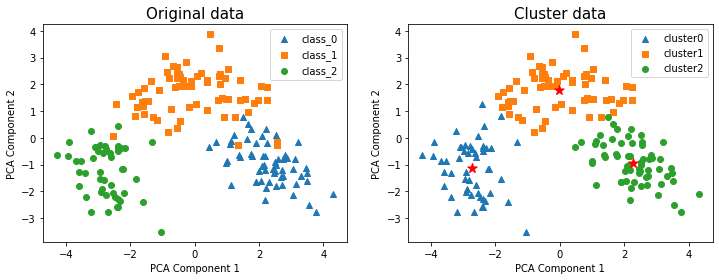

In [9]:
plt.figure(figsize=(12,4))
markers = ['^','s','o']
for k, column in enumerate(['target', 'cluster']):
  plt.subplot(1, 2, k+1) # target:0, cluster:1 이기 때문에 k+1
  for i, marker in enumerate(markers):
    x_data = df[df[column] == i]['PC1']
    y_data = df[df[column]  == i]['PC2']
    
    if k == 0:
      plt.title('Original data', fontsize=15)
      plt.scatter(x_data, y_data, marker=marker, label=wine.target_names[i])
    else:
      plt.title('Cluster data', fontsize=15)
      plt.scatter(x_data, y_data, marker=marker, label='cluster'+str(i))
      plt.scatter(x_data.mean(), y_data.mean(), marker='*', c='red', s=100) # 중심점 그리기 (원본데이터는 표기 필요 없음)

  plt.legend()
  plt.xlabel('PCA Component 1'), plt.ylabel('PCA Component 2')
plt.show()